
## Abtastrate


Die Abtastrate ist 100Hz

Geshätzte Grundfrequenz : 1-2Hz

In [ ]:
import numpy as np
print('Omega: %.2f - %.2f '% (np.pi*2*1,np.pi*2*2 ))

## Dimension

fn(t) hat die Dimension nx3
1.Spalte: a_0
2.Spalte: a_n
3.Spalte: b_n

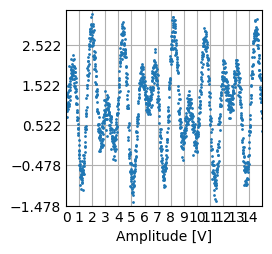

In [4]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('_mpl-gallery')

#---------------------------------------Data importieren--------------------------------
data = np.genfromtxt("data.txt")
# plot


#---------------------------------------Achsen separieren--------------------------------
x=data[:,0]
y=data[:,1]

#--------------------------------------Plot---------------------------------------------
fig, ax = plt.subplots()
ax.scatter(x,y,s=1)
ax.set(xlim=(0,np.amax(x)), xticks=np.arange(0, np.amax(x)),
       ylim=(np.amin(y)-0.1, np.amax(y)+0.1), yticks=np.arange(np.amin(y)-0.1, np.amax(y)+0.1))
ax.set_xlabel("time [s]")
ax.set_xlabel("Amplitude [V]")

plt.show()



### Fit mit FFT